# Pymaceuticals Inc.


### Analysis ###

1.In reference to the bar chart of mice per drug regimen, there are 10 treatments used for the study. The highest number of mice in the study are treated using Capomulin. while the lowest number of mice in the study are treated using Propriva.2.In reference to the box plot across four regimens of interest & summary statistics table, the final tumor volume treated by Capomulin and Ramicane trended lower than the others. Ramicane demonstrated lower final tumor volume, however it was used with a lower treatment than that of Capomulin. Fair results require equal treatments and variables.
3.
Capolmulin was used to treat Mouse ID l509 and the tumor volume seems to decrease with time. Sampling also charts that five mice treated with the same regimen supports the assumption that Capomulin could reduce the size of tumor volum
e4
In reference to the correlation between Capomulin with average weight and final tumor volume, the value is 0.84, meaning that there is a strong positive correlation between the two variables. The r-squared value of 0.71 indicates that the final tumor volume could be predicted by using the average weight of a msere.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])
merged_data_df = merged_data_df.rename(columns={'Age_months': 'Age (months)'})

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [16]:
# Checking the number of mice.
total_mice = len(merged_data_df['Mouse ID'].unique())
print(f'Number of mice in all the treatment regimens is: {total_mice}')

Number of mice in all the treatment regimens is: 249


In [18]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_mice = merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicated_mice_ID = merged_data_df.loc[duplicated_mice, 'Mouse ID' ].unique()
duplicated_mice_ID_data = merged_data_df.loc[merged_data_df['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [20]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mice_ID_data = merged_data_df.loc[merged_data_df['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
analysis_data_df=merged_data_df.drop(duplicated_mice_ID_data.index)

In [24]:
# Checking the number of mice in the clean DataFrame.
no_mice_analysis = len(analysis_data_df['Mouse ID'].unique())
print(f'Number of mice in all the treatment regimens is : {no_mice_analysis} (removed duplicated mice data)')

Number of mice in all the treatment regimens is : 248 (removed duplicated mice data)


## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drug_regimen_gp = analysis_data_df.groupby('Drug Regimen')
drug_regimen_gp
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = drug_regimen_gp['Tumor Volume (mm3)'].mean()
median = drug_regimen_gp['Tumor Volume (mm3)'].median()
var = drug_regimen_gp['Tumor Volume (mm3)'].var()
std = drug_regimen_gp['Tumor Volume (mm3)'].std()
sem = drug_regimen_gp['Tumor Volume (mm3)'].sem() 
summary_statistics_df = pd.DataFrame({
'Mean': mean,
 'Median': median,
 'Variance': var,
'Standard deviation': std,
'SEM': sem
 })
print('Method I')
summary_statistics_df

Method I


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_table = drug_regimen_gp['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df = summary_table.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})
print('Method II')
summary_agg_df
# Using the aggregation method, produce the same summary statistics in a single line
no_mice_per_regimen = drug_regimen_gp['Mouse ID'].count().sort_values(ascending=False)
no_mice_per_regimen

Method II


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

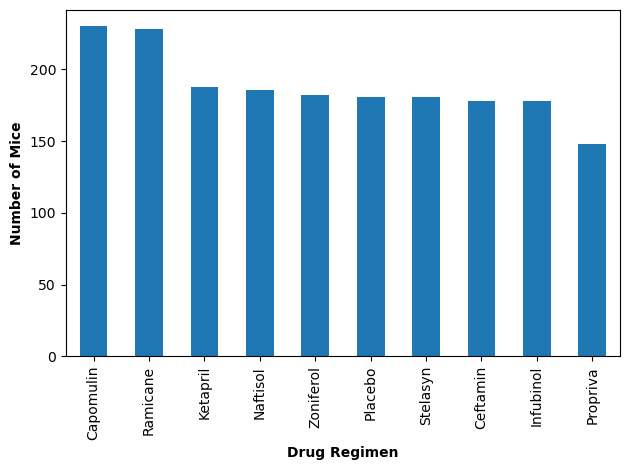

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pd_bar_mice_per_regimen = no_mice_per_regimen.plot(kind='bar' , width=0.5)
pd_bar_mice_per_regimen.set_xlabel('Drug Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_ylabel('Number of Mice', fontweight = 'bold')
plt.tight_layout()
pd_bar_mice_per_regimen.figure.savefig('images/pd_bar_mice_per_regimen.png')
plt.show()
plt.close()

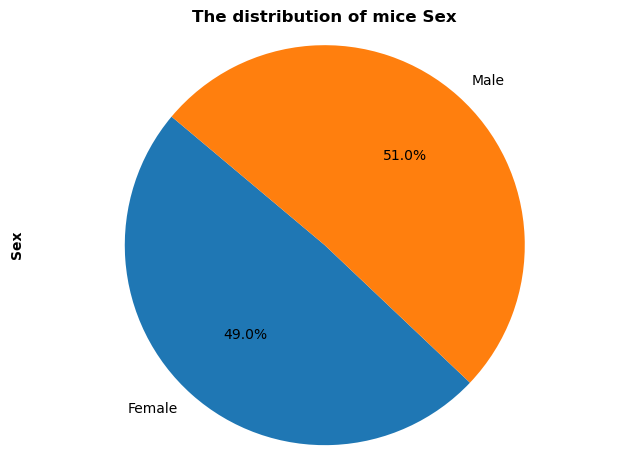

In [34]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_mice = analysis_data_df.groupby('Sex')['Sex'].count()
pd_pie_mice_sex = sex_mice.plot(kind='pie', autopct='%1.1f%%', startangle=140)
# Get the unique mice with their gender
plt.axis("equal")
pd_pie_mice_sex.set_title(label='The distribution of mice Sex' , fontweight = 'bold')
pd_pie_mice_sex.set_ylabel('Sex', fontweight = 'bold')

# Make the pie chart
plt.tight_layout()
plt.savefig('images/py_pie_mice_sex.png')

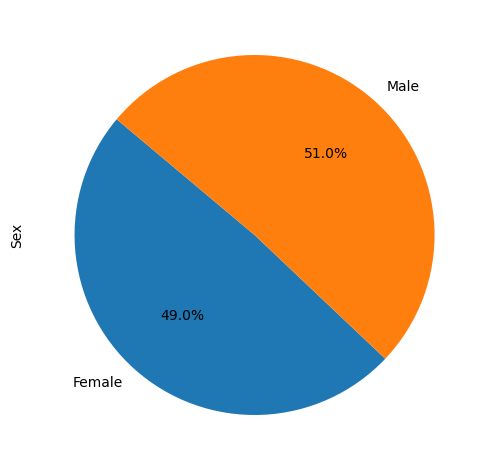

In [36]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
pd_pie_mice_sex = sex_mice.plot(kind='pie' , autopct='%1.1f%%', startangle=140)
# Get the unique mice with their gender
sex_mice = analysis_data_df.groupby('Sex')['Sex'].count()
sex_mice

# Make the pie chart
plt.tight_layout()
plt.savefig('images/py_pie_mice_sex.png')

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_vol = analysis_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_tumor_vol


Timepoint  Tumor Volume (mm3)
Drug Regimen Mouse ID                               
Capomulin    b128             45           38.982878
             b742             45           38.939633
             f966             20           30.485985
             g288             45           37.074024
             g316             45           40.159220
...                          ...                 ...
Zoniferol    q633             45           70.827796
             s337             45           62.109651
             w140              5           47.717952
             w575             45           68.401286
             x613             15           48.077646

[248 rows x 2 columns]

In [76]:
# Put treatments into a list for for loop (and later for plot labels)

regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#for drug in regimen:

quartiles = final_tumor_vol.quantile([.25,.5,.75])

quartiles

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
mean = final_tumor_vol.mean()
iqr = upperq-lowerq    
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

for drug in regimen:
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    final_tumor_vol_list.append(final_tumor_vol)

# Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                      | (final_tumor_vol > upper_bound)]




# Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    
    if outliers.count() > 0 :
        for i in outliers.index:
           print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')

print('----------------------------------------------------------')



Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 25.36 could be outliers.
Final tumor volume(mm3) for Capomulin above 87.67 could be outliers.
Average tumor volume(mm3) for Capomulin is: 57.75
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 23.34
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 25.36 could be outliers.
Final tumor volume(mm3) for Ramicane above 87.67 could be outliers.
Average tumor volume(mm3) for Ramicane is: 57.75
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 22.05
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 25.36 could be outliers.
Final tumor volume(mm3) for Infubinol above 87.67 could be outliers.
Average tumor volume(mm3) for Infubinol is: 57.75
Number of outliers for Capomulin is: 0
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin below 25.36 could be outliers.
Final tumor volume(mm3) for Ceftamin above 87.67 could be outliers.
Average tumor volume(mm3) for Ceft

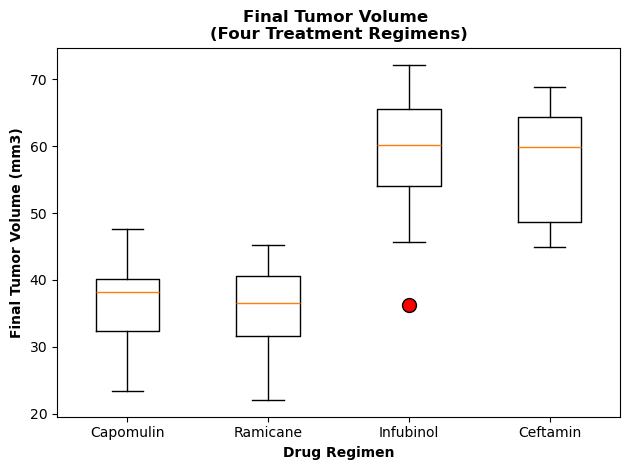

In [78]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})
final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')
plt.tight_layout()
final_tumor_plot.figure.savefig('images/final_tumor_boxplot.png')
plt.show()
plt.close()

## Line and Scatter Plots

In [82]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = analysis_data_df.loc[analysis_data_df['Drug Regimen'] == 'Capomulin']


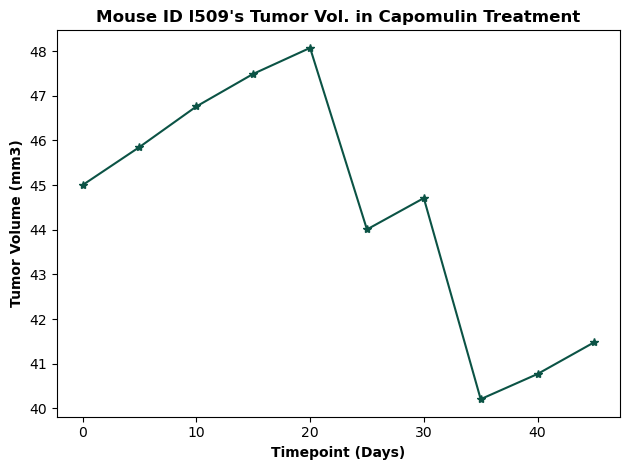

In [84]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*', color='#0B5345')
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')
plt.tight_layout()
plt.savefig('images/l509_tumor_plot.png')
plt.show()
plt.close()

## Correlation and Regression

In [110]:
final_tumor_vol = analysis_data_df.groupby(['Drug Regimen', 'Weight (g)']).last()[[ 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


my_Capomulin_df = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == 'Capomulin']

my_Capomulin_df

,Drug Regimen,Weight (g),Tumor Volume (mm3)
0,Capomulin,15,28.484033
1,Capomulin,17,31.896238
2,Capomulin,19,33.329098
3,Capomulin,20,37.311846
4,Capomulin,21,36.041047
5,Capomulin,22,40.159220
6,Capomulin,23,39.952347
7,Capomulin,24,47.685963
8,Capomulin,25,41.581521


The correlation between mouse weight and tumor vol is 0.92
The r-squared is: 0.85


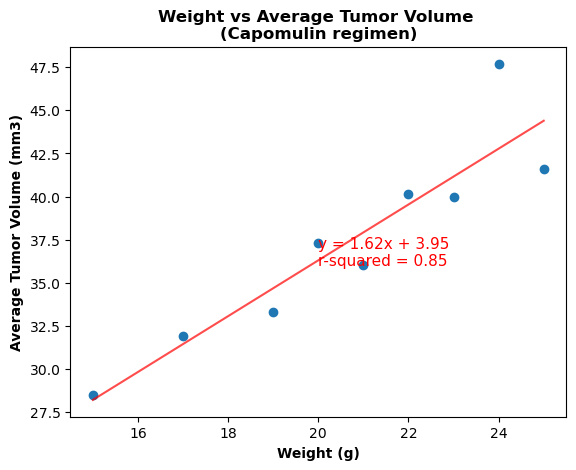

In [112]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_values = my_Capomulin_df['Weight (g)']
y_values =  my_Capomulin_df['Tumor Volume (mm3)']
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')
plt.savefig('images/scatter_weight_tumor_linear.png')
plt.show()
plt.close()

In [ ]:
The correlation between mouse weight and tumor vol is 0.84
The r-squared is: 0.71